In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from config import settings

## Load data

In [3]:
file_path = Path("..", settings.FILE_NAME_TO_SAVE)
vacancies_df = pd.read_csv(file_path)

vacancies_df.head()

,url,experience,salary_max,salary_min,is_remote,is_part_time,technologies,tags
0,https://jobs.dou.ua/companies/adwisely/vacanci...,Senior,4000.0,3000.0,True,False,"['Django', 'AWS', 'Postgres']",['Front-End']
1,https://jobs.dou.ua/companies/verybusy-recruit...,Senior,NaN,NaN,True,False,"['Flask', 'Flask', 'Azure', 'RabbitMQ']",['Backend']
2,https://jobs.dou.ua/companies/nearshorefriends...,NaN,NaN,NaN,True,False,"['Flask', 'Flask']",[]
3,https://jobs.dou.ua/companies/competera/vacanc...,Junior,NaN,NaN,True,False,"['AWS', 'Postgres', 'Apache', 'Redis', 'Fastap...",['Machine Learning']
4,https://jobs.dou.ua/companies/datarobot/vacanc...,Senior,6000.0,6000.0,True,False,"['Flask', 'AWS', 'Flask', 'Azure']",['Backend']


## Data cleaning

In [4]:
vacancies_df["technologies"] = vacancies_df["technologies"].apply(
    lambda x: 
    eval(x) 
    if isinstance(x, str) 
    else []
)
vacancies_df["tags"] = vacancies_df["tags"].apply(
    lambda x: 
    [
        item.replace("Back-End", "Backend").replace("Front-End", "Frontend") 
        for item 
        in eval(x)
    ] 
    if isinstance(x, str) else []
)


vacancies_df["salary_avg"] = vacancies_df[["salary_min", "salary_max"]].dropna().mean(axis=1)
vacancies_df.head()

,url,experience,salary_max,salary_min,is_remote,is_part_time,technologies,tags,salary_avg
0,https://jobs.dou.ua/companies/adwisely/vacanci...,Senior,4000.0,3000.0,True,False,"[Django, AWS, Postgres]",[Frontend],3500.0
1,https://jobs.dou.ua/companies/verybusy-recruit...,Senior,NaN,NaN,True,False,"[Flask, Flask, Azure, RabbitMQ]",[Backend],NaN
2,https://jobs.dou.ua/companies/nearshorefriends...,NaN,NaN,NaN,True,False,"[Flask, Flask]",[],NaN
3,https://jobs.dou.ua/companies/competera/vacanc...,Junior,NaN,NaN,True,False,"[AWS, Postgres, Apache, Redis, Fastapi, Playwr...",[Machine Learning],NaN
4,https://jobs.dou.ua/companies/datarobot/vacanc...,Senior,6000.0,6000.0,True,False,"[Flask, AWS, Flask, Azure]",[Backend],6000.0


## Data Analysis

### Distribution of jobs by experience level

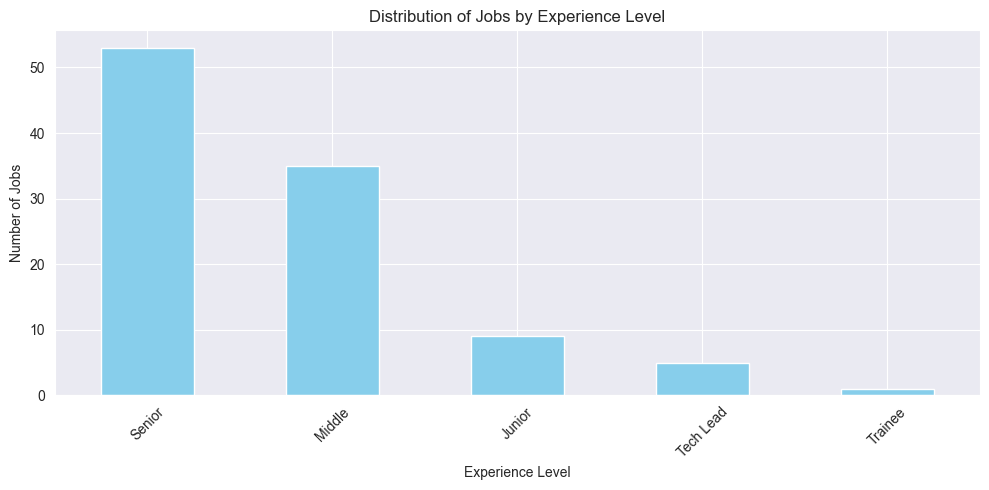

In [5]:
experience_counts = vacancies_df["experience"].dropna().value_counts()

plt.figure(figsize=(10, 5))
experience_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of Jobs by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Proportion of remote vs. non-remote jobs

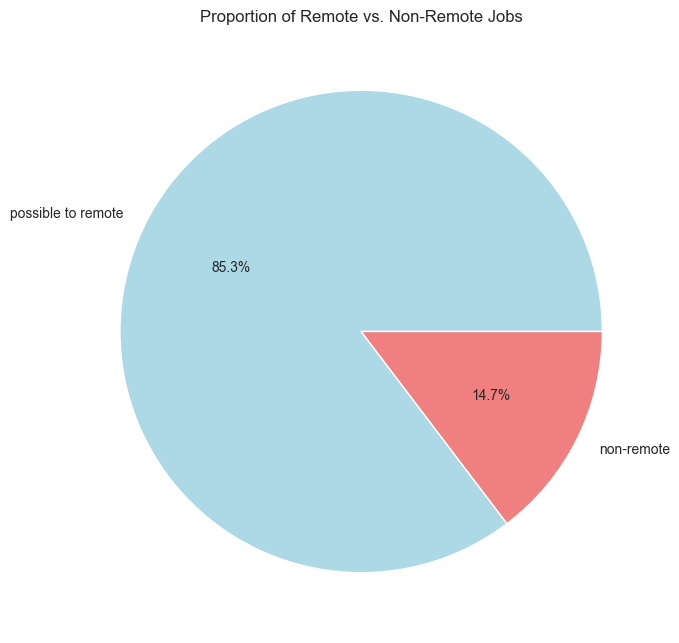

In [6]:
remote_counts = vacancies_df["is_remote"].value_counts()

plt.figure(figsize=(7, 7))
remote_counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightcoral"], labels=["possible to remote", "non-remote"])
plt.title("Proportion of Remote vs. Non-Remote Jobs")
plt.ylabel("")
plt.tight_layout()
plt.show()

### Salary Distribution(Min vs Max)

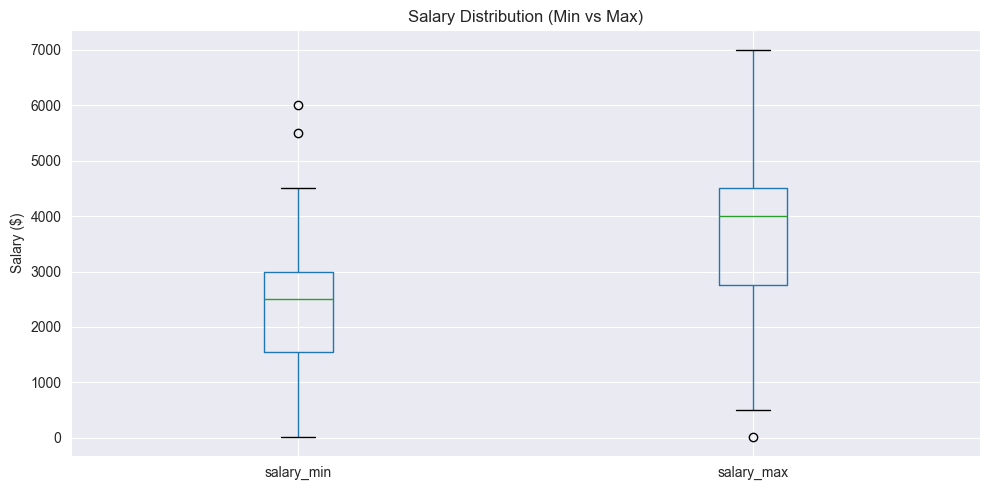

In [7]:
salary_stats = (vacancies_df[["salary_min", "salary_max", "salary_avg"]].dropna()
                .describe())


plt.figure(figsize=(10, 5))
vacancies_df[["salary_min", "salary_max"]].boxplot()
plt.title("Salary Distribution (Min vs Max)")
plt.ylabel("Salary ($)")
plt.tight_layout()
plt.show()

### Top technologies

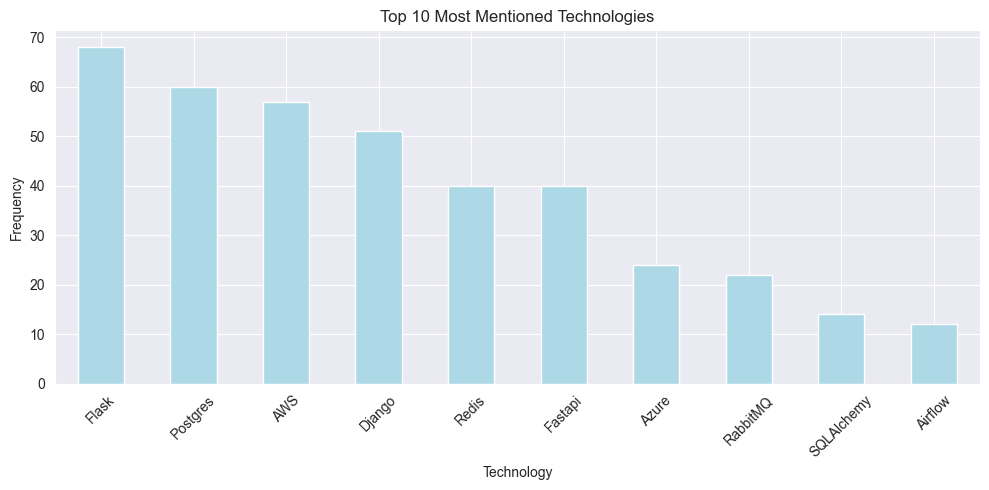

In [8]:
technologies_list = [tech for sublist in vacancies_df['technologies'] for tech in sublist]
top_technologies = pd.Series(technologies_list).value_counts().head(10)

plt.figure(figsize=(10, 5))
top_technologies.plot(kind="bar", color="lightblue")
plt.title("Top 10 Most Mentioned Technologies")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top mentioned key words

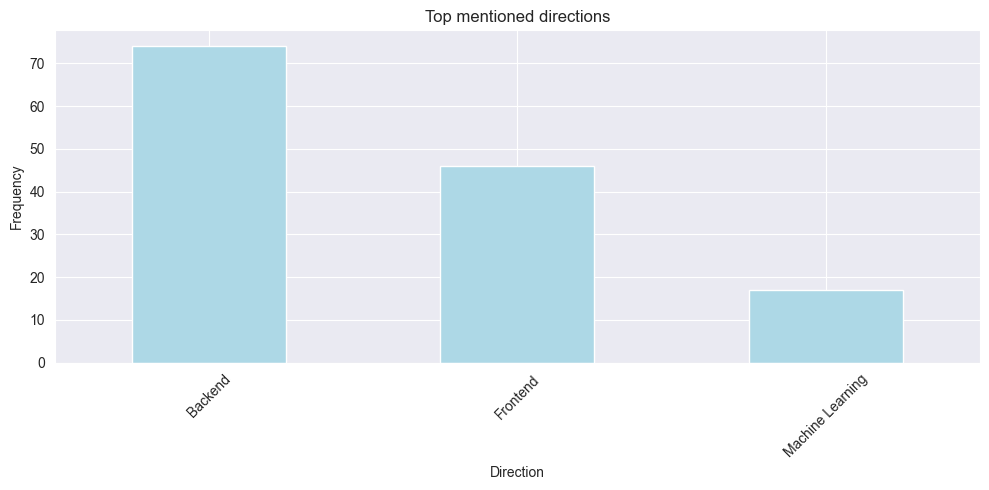

In [13]:
tag_list = [tech for sublist in vacancies_df["tags"] for tech in sublist]
top_tags = pd.Series(tag_list).value_counts()

plt.figure(figsize=(10, 5))
top_tags.plot(kind="bar", color="lightblue")
plt.title("Top mentioned directions")
plt.xlabel("Direction")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Avarage salary by mentioned technology

<Figure size 1200x600 with 0 Axes>

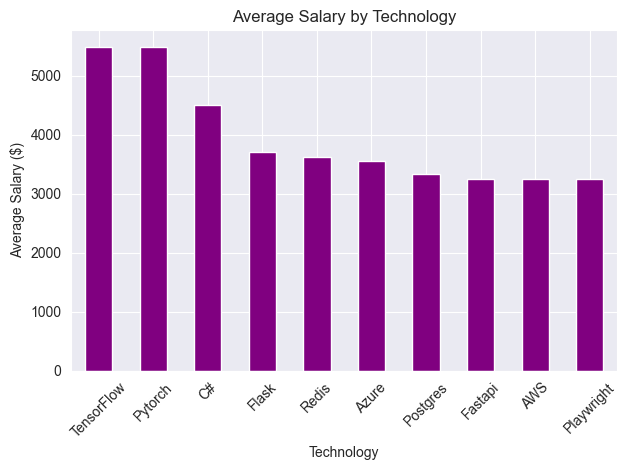

In [10]:
tech_salary = {}

for tech in technologies_list:
    tech_jobs = vacancies_df[vacancies_df["technologies"].apply(lambda x: tech in x)]
    avg_salary = tech_jobs["salary_avg"].dropna().mean()
    tech_salary[tech] = avg_salary

tech_salary_df = pd.DataFrame(list(tech_salary.items()), columns=["Technology", "Avg_Salary"]).sort_values(by="Avg_Salary", ascending=False)

plt.figure(figsize=(12, 6))
tech_salary_df.head(10).plot(kind="bar", x="Technology", y="Avg_Salary", color="purple", legend=False)
plt.title("Average Salary by Technology")
plt.xlabel("Technology")
plt.ylabel("Average Salary ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()